# South African Language Identification Solution
### EDSA 2022 Classification Hackathon
#### Israel Ezema

© Explore Data Science Academy



<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>

    1.1 Overview
    1.2 Problem Statement
    1.3 Instruction
        1.3.1 NLTK Corpora Installation
        1.3.2 Additional Installation
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Collect Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
    4.1 Missing Data Check
    4.2 Target Distribution Visualization

<a href=#five>5. Data Processing</a>
    
    5.1 Text Cleaning
    5.2 Remove Puntuation

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Modelling</a>
    
    7.1 Set Classifier
    7.2 Build Model Function
    7.3 Execute Classifer

<a href=#eight>8. Model Performance</a>
    
    8.1 Models Test Score
    8.2 Best Model Resolution
    8.3 Hypertune Best Model
    8.4 Best Model Confusion Matrix

<a href=#nine>9. Saving & Exporting Model</a>

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>

<a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

### 1.1 Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" width=80%/> 

With such a multilingual population, it is only obvious that the South African systems and devices should also be able to communicate in multi-languages.

Hence, I will be creating a Machine Learning Model which will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. The goal of the model is to determining the natural language that a piece of text is written in.

### 1.2 Problem Statement

Based on the linguistic diversity of the South African society, Having a model that can translate accurately any piece of text to it's required natural language, will go a long way in bridging the communication gap in any of her systems, encouraging inclusion and diversity, and finally enhanced productivity.

### 1.3 Instruction

#### 1.3.1 Ensure you've got NLTK Corpora installed

Some of the `nltk` text processing involve a lookup operation. For example, to find all [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) in a given string of text, we require a list of all possible stopwords in the English language to use for the lookup. Such a list is refered to as a [corpus](https://en.wikipedia.org/wiki/Text_corpus). Therefore, first download the corpora we're going use if you don't have it installed, otherwise we may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections. Not to worry, as we can easily avoid these errors by downloading the [corpora](http://www.nltk.org/nltk_data/) using the `nltk` downloader tool:

You should see this pop-up box. 

**NOTE:** the box might pop-up in the backround, in which case you should use `alt + tab` to switch to the downloader window.

<img src="https://github.com/Explore-AI/Pictures/blob/master/nltk_downloader.png?raw=true" width=25%/> 

Use it to navigate to the item we need to download: 
- stopwords corpus (Corpora tab)
- punkt tokenizer models (Models tab)

Navigate to these, click the download button, and exit the downloader when finished.

###### 1.3.2 Additional Installations Required to run this Notebook Analysis Effectively

`Word Cloud:`
System Requirement: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/


In [1]:
''' If you don't have it Installed, Remove Hashtag to Run'''
# !pip install wordcloud

" If you don't have it Installed, Remove Hashtag to Run"


`Imblearn:` Required while handling Class Imbalance 

In [2]:
# !pip install imblearn

So, Let's Proceed

<a id="two"></a>
## 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

**SEE** in-line comments BELOW for purpose per importation.

In [3]:
""" For seamless run, Import All required libraries here """

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # for loading CSV data
import numpy as np                                                    # Used for mathematical operations
import matplotlib.pyplot as plt                                       # for Graphical Representation
%matplotlib inline                                                    
import seaborn as sns                                                 # for specialized plots
import re                                                             
import math                                                           
sns.set()                                                             # set plot style

# Libraries for data preparation
import nltk
import string
import re                                

# Libraries for Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer   

# Libraries for Model Building
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split                  # To split the data into training and testing data
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Libraries for calculating performance metrics
from sklearn import metrics                                           # for
from sklearn.metrics import accuracy_score, recall_score, precision_score 
from sklearn.metrics import  classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
import time

# Libraries to Save/Restore Models
import pickle


import warnings
warnings.filterwarnings('ignore')

In [4]:
'''
if you haven't installed the NLTK corpora, Remove Hashtag below and Run 
IF NOT, JUST PASS!!!
'''
# nltk.download()

"\nif you haven't installed the NLTK corpora, Remove Hashtag below and Run \nIF NOT, JUST PASS!!!\n"

<a id="three"></a>
## 3. Collect Data
<a href=#cont>Back to Table of Contents</a>

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

In [5]:
# Load Data
df_train = pd.read_csv('train_set.csv')
df_test =pd.read_csv('test_set.csv')

In [6]:
# View Dataset
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [7]:
# Lets see the shape of our Dataset.
print(f'Shape of TRAIN dataset: {df_train.shape}')
print(f'Shape of TEST dataaet: {df_test.shape}')

Shape of TRAIN dataset: (33000, 2)
Shape of TEST dataaet: (5682, 2)


In [8]:
# printing a list of all sentiment types we have in our data.
type_labels = list(df_train.lang_id.unique())
print(type_labels)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


We have available for training and Test our model, `33000 & 5682 observations` respectively as seen above. Each label represents one of the following classes:

Class Description
*  **xho :**     Xhosa Language
*  **eng :**     English Language
*  **nso :**     Nsowiki Language
*  **ven :**     Venda Language; also known as Tshivenḓa, or Luvenḓa is an official language in South Africa. 
*  **tsn :**     Tswana Language
*  **nbl :**     Ndebele Language
*  **zul :**     Zulu Language
*  **ssw :**     Swazi Language
*  **tso :**     Tsonga Language
*  **sot :**     Sotho Language
*  **afr :**     Afrikaans Language

Variable definitions
- **lang_id :**  Language Class
- **text :**     Text Language translation  

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

This includes looking to understand patterns in our data, pinpoint any corrupt data and indicate relationships between variables. This phase includes descriptive statistics and data visualisations.

Now let's proceed to carrying out some EDA on our train dataset

#### 4.1 Missing Data Check
At the training phase it's important your dataset is ideal as possible, meaning things like; NO MISSING DATA in each observation.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


The features in our dataset are only in `Object` form , and All features seem to have `Zero Non-Null` values. let's check to confirm count of null values present in each feature.

In [10]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

This Confirms; `No Missing Values in our Dataset`

#### 4.2 Target Distribution Visualization

Let's Visualize the distribution of our Target Response within our Training DataSet i.e. how many data samples we have for each of the different language_ID

In [11]:
# Let's see the count of observations per lan_id
df_train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

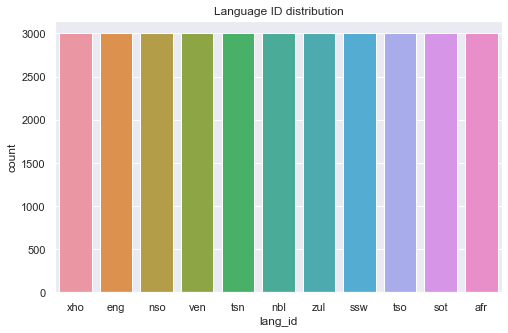

In [12]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(df_train['lang_id'])
plt.title('Language ID distribution')
plt.show()

The Distribution chart clearly reveals our dataset is `Well Balance`. [Class Imbalance]('https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/') can greatly affect the training of our model. [Click to Now more.]('https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/') 

<a id="five"></a>
## 5. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>

Let's get the data and clean it up a bit

In [13]:
# View Data
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['text'].head(5)

0    umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika                                            
1    i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo            
2    the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3    o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la

### 5.1 Text Cleaning

These will include;

#### 5.1.1 Remove Noise

Analysing to removing Removing HTML text, Removing escape sequences, making everything lower case, 

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format

In [14]:
# Define function that handles
def clean_text(text):
    """
    This function uses regular expressions to 
        - remove html characters,
        - remove escape sequences,
        - remove capitalization,
        - any extra white space from each text and then converts them to lowercase.

    Input:
    text: original text
          datatype: string

    Output:
    texts: modified text
           datatype: string
    """
    
    # replace the html characters with " "
    text = re.sub('<.*?>', ' ', text)
    # replace escape sequence with space
    escape_seq = ["\r", "\n",'\a', '\b', '\f', "\`", '\”', '\t']
    for i in escape_seq:
        text = re.sub(i, " ", text)
    # Remove Capitalization
    text = text.lower()
    # plit and join the words
    text=' '.join(text.split())
    
    return text

In [15]:
# Applying function to clean text feature
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [16]:
# Let's view the MESSAGE created
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['text'].head(5)

0    umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika                                            
1    i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo            
2    the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3    o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la

#### 5.1.2 Remove Punctuation 

Haven removed some unnecessary information (i.e info not entirely useful to training our desired outcome), we need make all the text lower case to remove some noise from capitalisation.

In [17]:
# Define a function to handle punctuation removal
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [18]:
# Remove Punctutaion Noise
# df_train['text'] = df_train['text'].apply(remove_punctuation)

In [19]:
# Verify Actions
# pd.set_option('display.max_colwidth', -1)      # set to display full text in df
# df_train['text'].head(5)

Changes can be seen like `kwazulu-natal` of line 2 converted to `kwazulunatal`

<a id="six"></a>
## 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

This involves All actions to make ready our data to serve those structured selected features to models upon request.

In [20]:
# First features and label 
X = df_train['text']
y = df_train['lang_id']

# split data to Train/Test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

Before we move on, let's take a look at the distribution of observations between our classes.

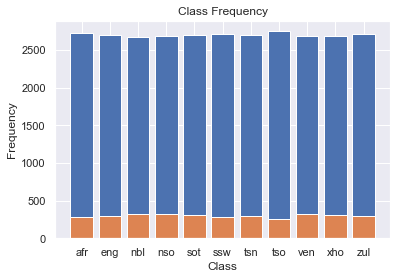

tso    2747
afr    2719
ssw    2714
zul    2705
eng    2703
tsn    2703
sot    2693
xho    2687
nso    2678
ven    2678
nbl    2673
Name: lang_id, dtype: int64

In [21]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_val, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr'], 
           labels=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr'])

plt.show()
y_train.value_counts()

**Classes are near Balance with min count `ven = 2366` and max count `tso = 2439`**

The Effect of Class imbalance can be devasteting to model performance. 

let's proceed to initializing and fitting and training our model

<a id="seven"></a>
## 7. Modeling
<a href=#cont>Back to Table of Contents</a>



#### 7.1 Set Classifier

In [22]:
"""
You can go ahead to adding to try other models
this list of classifiers
"""

classifiers = [#LinearSVC(random_state=42),
               
               #SVC(),
               
               MultinomialNB(),
               
               #ComplementNB(),
               
               #LogisticRegression(random_state=42,
#                                   multi_class='ovr',
#                                   n_jobs=1,
#                                   C=1e5,
#                                   max_iter=4000),
               
               #RandomForestClassifier(max_depth = 25, random_state = 42),
               
               #KNeighborsClassifier(n_neighbors=5),
               
               #SGDClassifier(loss='hinge',
#                              penalty='l2',
#                              alpha=1e-3,
#                              random_state=42,
#                              max_iter=5,
#                              tol=None)
               ]

#### 7.2 Build Model function

In [23]:
def models_building(classifiers, X_train, y_train, X_val, y_val):
    """
    This function takes in a list of classifiers and both the train and validation sets
    and return a summary of F1-score and processing time as a dataframe

    Input:
    classifiers: a list of classifiers to train
                 datatype: list
    X_train: independent variable for training
                 datatype: series
    y_train: dependent variable for training
                 datatype: series
    X_val: independent variable for validation
                 datatype: series
    y_val: dependent variable for validation
                 datatype: series

    Output:
    model_summary: F1 Score for all the classifiers
                 datatype: dataframe
    """

    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_para = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                       max_df=0.9,
                                                       ngram_range=(1, 1))),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_para.fit(X_train, y_train)
        predictions = clf_para.predict(X_val)
        run_time = time.time() - start_time

        # Score output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')

#### 7.2 Execute Classifier

In [24]:
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)

<a id="eight"></a>
## 8. MODEL PERFORMANCE
<a href=#cont>Back to Table of Contents</a>



#### 8.1 Models Testing Scores


In [25]:
df = classifiers_df.sort_values('F1-Macro', ascending=False)
df

,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
MultinomialNB,0.998784,0.998788,0.998788,4.47625


###### Base Result

    F1-Macro	F1-Accuracy	F1-Weighted	Execution Time
`MultinomialNB	0.997859	0.997879	0.997879	39.575837`

`ComplementNB	0.996329	0.996364	0.996360	39.478670`

`LogisticRegression	0.995438	0.995455	0.995456	1304.015171`

`LinearSVC	0.995128	0.995152	0.995151	55.753337`

`SVC	0.993580	0.993636	0.993647	2216.157977`

`SGDClassifier	0.982821	0.983030	0.982989	40.524135`

`KNeighborsClassifier	0.966650	0.967121	0.966820	46.544238`

`RandomForestClassifier	0.941830	0.941515	0.942629	52.378196`

#### 8.2 Best Model Resolution

The most performing is the Multinomial Naive Bayes with F1-Macro of 99.9% and accuracy of 99.9% while closely followed by Complement Naive Bayes, Logistic Regression, Linear Support Vector Classifier, Support Vector Machine etc.

We will proceed with the first two algorithms (to see which will come out better) by applying hyperparameter tunining, as they are the most performing models and considering their execution time.

#### 8.3 Hypertune Best Model

In [26]:
# Refining the train-test split for validation:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [27]:
# Creating a pipeline for the gridsearch

# set parameter grid
param_grid = {'alpha': [0.1, 1, 5, 10]}  

hyper_best_model = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                max_df=0.9,
                                                ngram_range=(1, 5))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

# Fiting data model
hyper_best_model.fit(X_train, y_train) 

# predicting the fit on validation set
y_pred = hyper_best_model.predict(X_val)  

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         afr       0.99      1.00      1.00       281
         eng       1.00      1.00      1.00       297
         nbl       0.99      1.00      1.00       327
         nso       1.00      0.99      1.00       322
         sot       0.99      1.00      1.00       307
         ssw       1.00      1.00      1.00       286
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       1.00      1.00      1.00       313
         zul       1.00      0.99      0.99       295

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [28]:
print(f'Accuracy Score: {round(metrics.accuracy_score(y_val, y_pred), 2) * 100}''%')

Accuracy Score: 100.0%


#### 8.4 Best Model Confusion matrix

In [29]:
labels = ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']
pd.DataFrame(data=confusion_matrix(y_val, y_pred), index=labels, columns=labels)

,xho,eng,nso,ven,tsn,nbl,zul,ssw,tso,sot,afr
xho,281,0,0,0,0,0,0,0,0,0,0
eng,0,297,0,0,0,0,0,0,0,0,0
nso,1,0,326,0,0,0,0,0,0,0,0
ven,0,0,0,320,2,0,0,0,0,0,0
tsn,0,0,0,0,307,0,0,0,0,0,0
nbl,0,0,0,0,0,286,0,0,0,0,0
zul,1,0,0,0,0,0,296,0,0,0,0
ssw,0,0,0,0,0,0,0,253,0,0,0
tso,0,0,0,0,0,0,0,0,322,0,0
sot,0,0,0,0,0,0,0,0,0,313,0


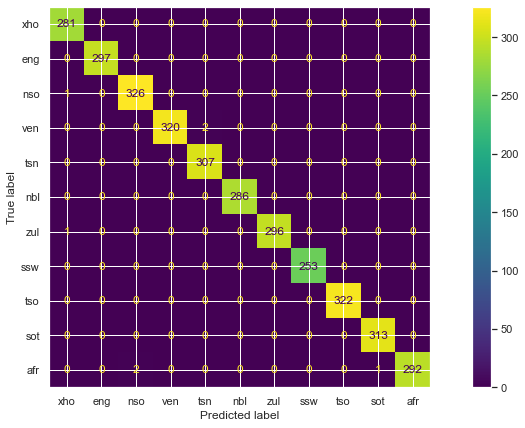

In [30]:
# Confusion matrix
labels = ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

<a id="nine"></a>
## 9. SAVING & EXPORTING MODEL
<a href=#cont>Back to Table of Contents</a>

In [31]:
# Save Test Target variable predictions as CSV for upload to Kaggle.
submission_df = pd.DataFrame(df_test['index'])
submission_df['lang_id'] = hyper_best_model.predict(df_test['text'])
submission_df.to_csv('submission_3.csv', index=False)

<a id="ten"></a>
## 10. Conclusion
<a href=#cont>Back to Table of Contents</a>

So far, haven tried out several algorithm, we've can thus infer that Multinomial Naive Bayes classifier performed best both in the training and validation phase with an accuracy score of over 99%, representing it's ability when dealing with unforseen data. Hence say our models failure rate is way below 5%.

<a id="eleven"></a>
## 11. Recommendation
<a href=#cont>Back to Table of Contents</a>

As a South African Language Trnslator, this model can be Integrated into any system, interface or platform to aid Translates words, phrases, sentences and whole paragraphs of text between different and choosen South African language.

<a id="ref"></a>
## Reference Links
<a href=#cont>Back to Table of Contents</a>

* [EXPLORE Data Science Academy Resources](https://explore-datascience.net/)
* [GitHub Collab Ref.](https://github.com/Ezysticks/south_african_language_identification/)
* [Kaggle Collab Ref](https://https://www.kaggle.com/competitions/south-african-language-identification/overview)